# Project On Automobile Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [66]:
am_data=pd.read_csv("C:\\Users\\Laptop-PC\\Documents\\machine learning module\\AutoData.csv")
am_data.head(3)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


“Price” column is the target variable and rest of the columns are independent variables.

In [3]:
am_data.shape

(205, 25)

it contains 205 records with 25 columns

In [4]:
am_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

 it has no null values

In [5]:
# numerical summary of data

am_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleaning

In [6]:
am_data.duplicated().sum()

0

there is no duplicate values

In [7]:
#  1st column of the dataset
#symboling:it assigned a risk factor,+3 indicates that the auto is risky, -3 indicates that it is probably pretty safe

am_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [13]:
am_data['make'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: make, Length: 147, dtype: int64

In [67]:
# make is not a suitable match for this column so we will change the column name

car_company=am_data['make'].apply(lambda x : x.split(' ')[0])

In [68]:
#deleting original data

am_data=am_data.drop(['make'],axis=1)

In [69]:
# inserting new column name in place of 'make' so that its relatable

am_data.insert(1,"car_company",car_company)
am_data.head(2)

,symboling,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [70]:
am_data.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

we can see that there are some spelling error (maxda = mazda, Nissan = nissan, porsche = porcshce, toyota = toyouta, vokswagen = volkswagen = vw ) so we have to fix this all 

In [71]:
# correcting the spelling error

am_data['car_company']=am_data['car_company'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [72]:
am_data['car_company'].value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [20]:
am_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [21]:
am_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [22]:
am_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [23]:
am_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [24]:
am_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [25]:
am_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [26]:
am_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

In [27]:
am_data['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

In [28]:
am_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [29]:
am_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [30]:
am_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

we have checked most of the columns and all are ready to use now we will check some relationships with target variable 

In [73]:
# independent variables are again divided into Categorical and Numerical variables.

var=am_data.columns
numerical_var=am_data._get_numeric_data().columns
categorical_var = list(set(var) - set(numerical_var))

In [74]:
numerical_var

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [75]:
print(categorical_var)

['enginetype', 'aspiration', 'doornumber', 'fueltype', 'carbody', 'enginelocation', 'fuelsystem', 'car_company', 'drivewheel', 'cylindernumber']


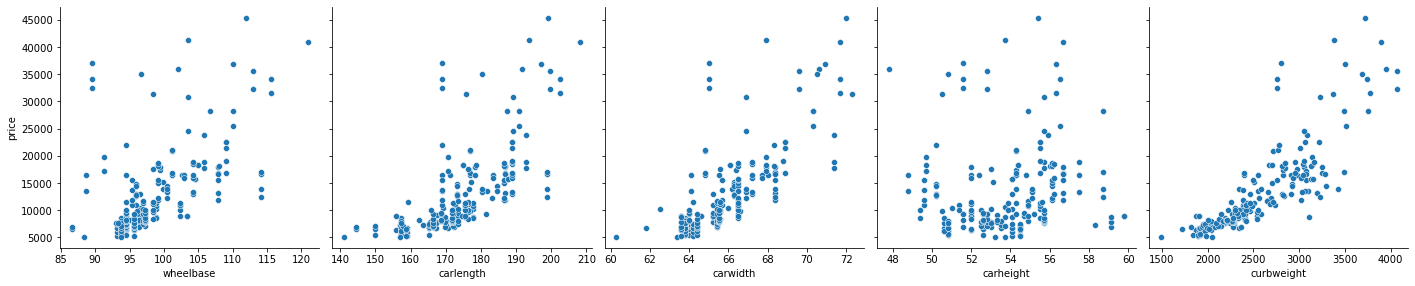

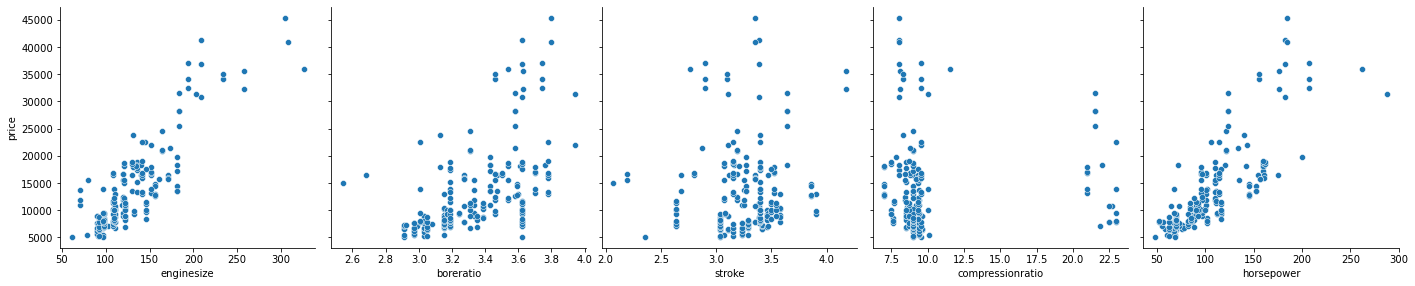

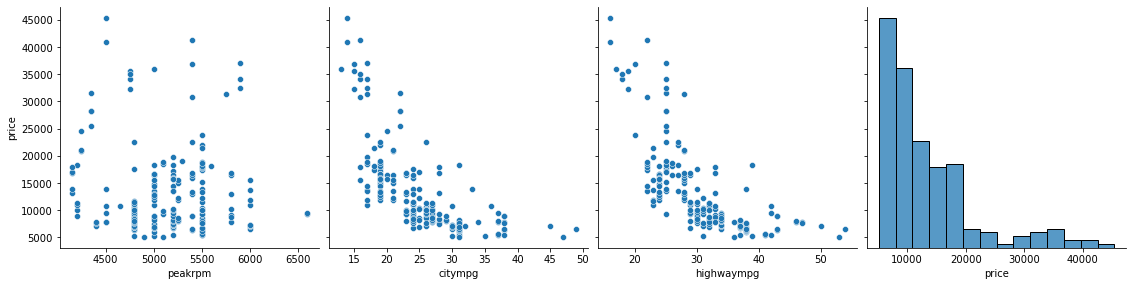

In [76]:
# lets see how price are related with other variable using scatter plot

sb.pairplot(am_data,x_vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight'],y_vars='price',height=4,aspect=1,kind='scatter');
sb.pairplot(am_data,x_vars=['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower'],y_vars='price',height=4,aspect=1,kind='scatter');
sb.pairplot(am_data,x_vars=['peakrpm', 'citympg', 'highwaympg', 'price'],y_vars='price',height=4,aspect=1,kind='scatter');


we can see that, price and curbweight,enginesize,horsepower make a linear relation 
price and wheelbase,carlength,carwidth has slight linear relationship
but there is no linear relation b/w price and carheight,boreratio,storke,compressionration,peakrpm,citympg,highwaympg

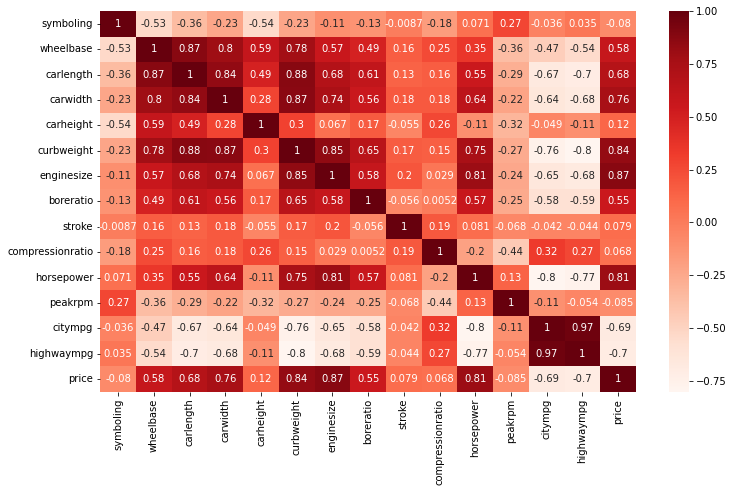

In [91]:
# lets see the correlation b/w diff variables

plt.figure(figsize=(12,7))
sb.heatmap(am_data.corr(),annot=True,cmap='Reds');



we can see that Price is positively correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower
and Price is negatively correlated with citympg and highwaympg..

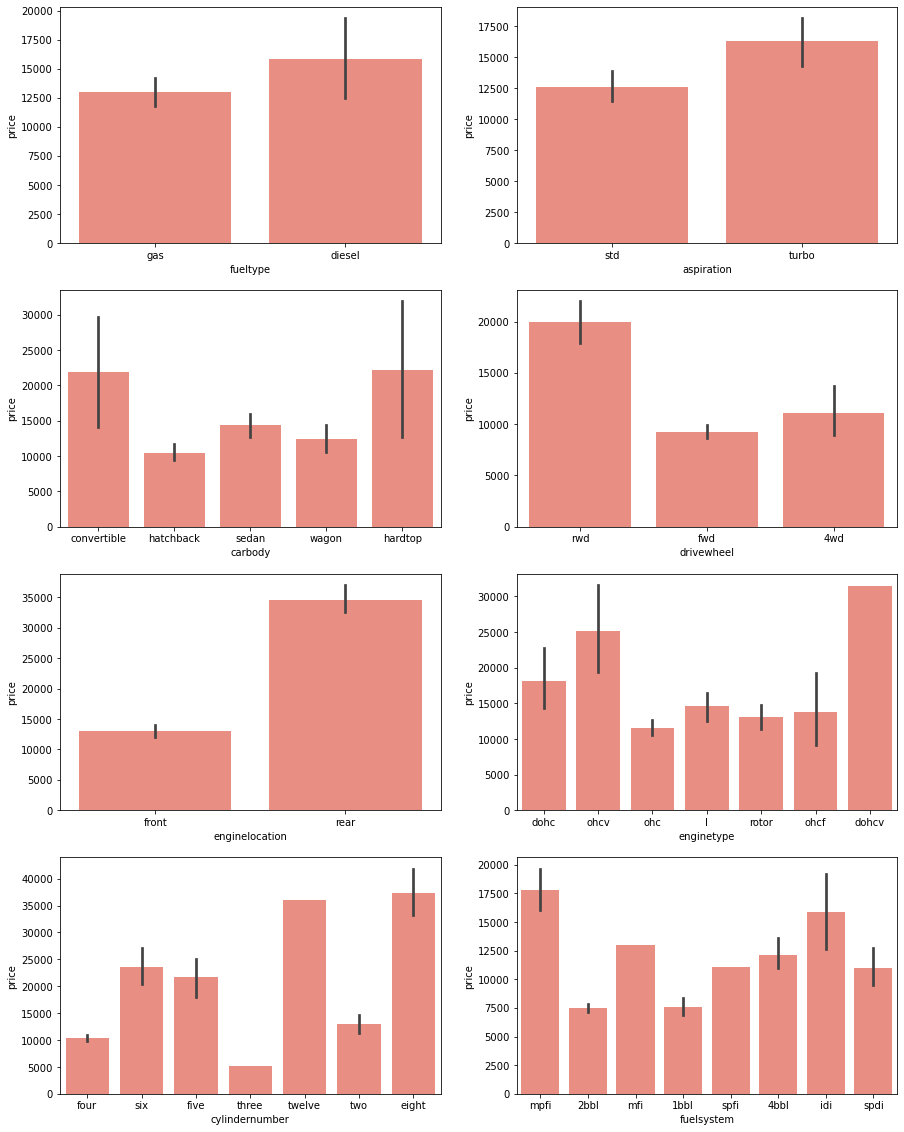

In [92]:
# we are using barplot to show relation of categorical and target variable

plt.figure(figsize = (15,20))
plt.subplot(4,2,1)
sb.barplot(x = 'fueltype', y = 'price', data = am_data,color='salmon');
plt.subplot(4,2,2)
sb.barplot(x = 'aspiration', y = 'price', data = am_data,color='salmon');
plt.subplot(4,2,3)
sb.barplot(x = 'carbody', y = 'price', data = am_data,color='salmon');
plt.subplot(4,2,4)
sb.barplot(x = 'drivewheel', y = 'price', data = am_data,color='salmon');
plt.subplot(4,2,5)
sb.barplot(x = 'enginelocation', y = 'price', data = am_data,color='salmon');
plt.subplot(4,2,6)
sb.barplot(x = 'enginetype', y = 'price', data = am_data,color='salmon');
plt.subplot(4,2,7)
sb.barplot(x = 'cylindernumber', y = 'price', data = am_data,color='salmon');
plt.subplot(4,2,8)
sb.barplot(x = 'fuelsystem', y = 'price', data =am_data,color='salmon');

we can see that,diesel cars are mostly used as compared to fuel gas cars.
cars with turbo aspiration and rwd drivewheel with rear engine location are mostly used,
The price of car is directly proportional to no. of cylinders in most cases,
all the types of carbody is relatively cheaper as compared to convertible and hardtop carbody,
dohcv enginetype with  mpfi fuelsystem are mostly used


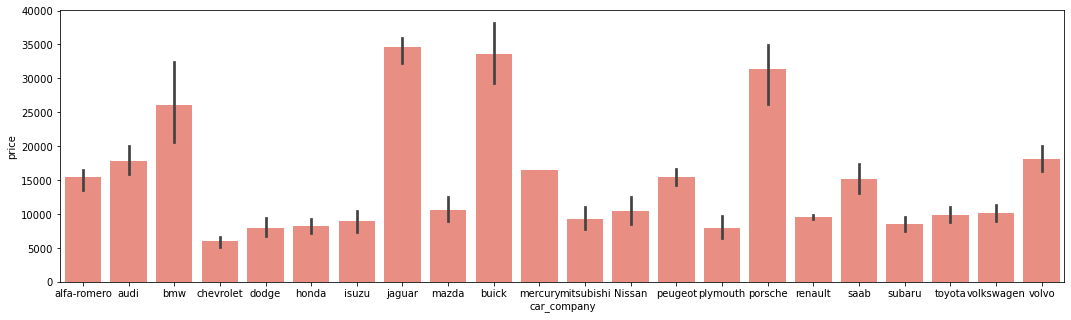

In [93]:
plt.figure(figsize = (18,5))

sb.barplot(x = 'car_company', y = 'price', data = am_data,color='salmon');

 it is clearly shows that the brands with most expensive vehicles in the data belong to bmw,jaguar,buick & porsche

### Data Preparation :

In [77]:
# prepare data for model building.

# Split the data into x and y.

x = am_data.drop(['price'],axis=1)
y = am_data['price']

In [78]:
# Creating dummy variables for categorical variables

categorical_var = am_data.select_dtypes(include=['object'])

# convert into dummies
dummies = pd.get_dummies(categorical_var, drop_first=True)

# drop categorical variables 
x = x.drop(list(categorical_var.columns), axis=1)

# concat dummy variables with X
x= pd.concat([x, dummies], axis=1)

#### Scaling the features and getting the final list of columns in dataframe for model building.


In [79]:
from sklearn.preprocessing import scale
cols = x.columns   # storing column names in cols
x = pd.DataFrame(scale(x))  # scaling (the df is converted to a numpy array)
x.columns = cols
x.columns


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company_alfa-romero', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_chevrolet', 'car_company_dodge',
       'car_company_honda', 'car_company_isuzu', 'car_company_jaguar',
       'car_company_mazda', 'car_company_mercury', 'car_company_mitsubishi',
       'car_company_peugeot', 'car_company_plymouth', 'car_company_porsche',
       'car_company_renault', 'car_company_saab', 'car_company_subaru',
       'car_company_toyota', 'car_company_volkswagen', 'car_company_volvo',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'engi

In [80]:
# split into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3)

In [81]:
x_train.shape,x_test.shape

((143, 64), (62, 64))

### Model Building :

In [82]:
# Building the first model with all the features

from sklearn.linear_model import LinearRegression

#  create instance
lr = LinearRegression()


In [83]:
# fitting the training set
lr.fit(x_train, y_train)

# predict the test set
y_pred = lr.predict(x_test)


In [84]:
from sklearn.metrics import r2_score


In [57]:
r2_score(y_test,y_pred)

0.8987456240637078

getting 89% R-squared with all the variables,Now we will build the model with lesser features

In [85]:
# for lessor features we will use RFE to select optimal features

from sklearn.feature_selection import RFE

In [86]:
#create rfe parameter
lr=LinearRegression()
rfe=RFE(lr,12)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [87]:
rfe.support_

array([False,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [88]:
x_train.columns[rfe.support_]

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'car_company_bmw',
       'car_company_peugeot', 'car_company_porsche', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear'],
      dtype='object')

In [89]:
# subset the features selected by rfe
    
cols=x_train.columns[rfe.support_]

In [90]:
# fitting SLR to training set 

import statsmodels.api as sm       # Model Building 

x_train_sm = sm.add_constant(x_train[cols])       # add constant to get an intercept

lr = sm.OLS(y_train,x_train_sm).fit()        # fit the regression line using OLS 

x_train_sm.head(3)

,const,wheelbase,carlength,carwidth,curbweight,car_company_bmw,car_company_peugeot,car_company_porsche,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear
0,1.0,-1.690772,-0.426521,-0.844782,-0.014566,-0.201517,-0.23812,-0.158114,-0.201517,-0.720082,-0.938474,-0.372678,-0.121867
6,1.0,1.172521,1.515437,2.566488,0.555313,-0.201517,-0.23812,-0.158114,-0.201517,-0.720082,1.065559,-0.372678,-0.121867
31,1.0,-2.023713,-2.392856,-0.938242,-1.418085,-0.201517,-0.23812,-0.158114,-0.201517,1.388730,-0.938474,-0.372678,-0.121867


In [91]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.45e-66
Time:                        21:02:02   Log-Likelihood:                -1287.7
No. Observations:                 143   AIC:                             2601.
Df Residuals:                     130   BIC:                             2640.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.32e+04    

In [92]:
# to check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Features'] = x_train[cols].columns
vif_data['VIF'] = [variance_inflation_factor( x_train[cols].values, i).round(2) 
                   for i in range( len(x_train[cols].columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
vif_data

,Features,VIF
9,carbody_sedan,12.02
1,carlength,9.85
8,carbody_hatchback,9.55
3,curbweight,6.90
0,wheelbase,6.85
2,carwidth,6.83
10,carbody_wagon,6.23
11,enginelocation_rear,3.70
6,car_company_porsche,3.26
7,carbody_hardtop,3.11


we can see that few variables have multicollinearity lets check with 10 variable

### Build the model with 10 variables:

In [93]:
lr2=LinearRegression()
rfe2=RFE(lr2,10)
rfe2.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [94]:
x_train.columns[rfe2.support_]

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'car_company_bmw',
       'car_company_peugeot', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear'],
      dtype='object')

In [95]:
cols_1=x_train.columns[rfe2.support_]

In [96]:
x_train_sm1 = sm.add_constant(x_train[cols_1])       
lr2 = sm.OLS(y_train,x_train_sm1).fit()       
x_train_sm1.head(3)

,const,wheelbase,carlength,carwidth,curbweight,car_company_bmw,car_company_peugeot,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear
0,1.0,-1.690772,-0.426521,-0.844782,-0.014566,-0.201517,-0.23812,-0.720082,-0.938474,-0.372678,-0.121867
6,1.0,1.172521,1.515437,2.566488,0.555313,-0.201517,-0.23812,-0.720082,1.065559,-0.372678,-0.121867
31,1.0,-2.023713,-2.392856,-0.938242,-1.418085,-0.201517,-0.23812,1.388730,-0.938474,-0.372678,-0.121867


In [97]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.32e-65
Time:                        21:02:14   Log-Likelihood:                -1295.6
No. Observations:                 143   AIC:                             2613.
Df Residuals:                     132   BIC:                             2646.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.318e+04    

In [98]:
# to check multicollinearity

vif_data = pd.DataFrame()
vif_data['Features'] = x_train[cols_1].columns
vif_data['VIF'] = [variance_inflation_factor( x_train[cols_1].values, i).round(2) 
                   for i in range( len(x_train[cols_1].columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
vif_data

,Features,VIF
1,carlength,9.67
3,curbweight,6.67
0,wheelbase,6.49
2,carwidth,6.44
7,carbody_sedan,5.96
6,carbody_hatchback,4.98
8,carbody_wagon,3.45
5,car_company_peugeot,1.39
9,enginelocation_rear,1.32
4,car_company_bmw,1.09


In [99]:
x3 = x_train[cols_1].drop(['curbweight'], axis =1)

x3_sm = sm.add_constant(x3)

lr3 = sm.OLS(y_train,x3_sm).fit()

x3_sm.head(2)


,const,wheelbase,carlength,carwidth,car_company_bmw,car_company_peugeot,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear
0,1.0,-1.690772,-0.426521,-0.844782,-0.201517,-0.23812,-0.720082,-0.938474,-0.372678,-0.121867
6,1.0,1.172521,1.515437,2.566488,-0.201517,-0.23812,-0.720082,1.065559,-0.372678,-0.121867


In [100]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     71.33
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.51e-46
Time:                        21:02:23   Log-Likelihood:                -1345.9
No. Observations:                 143   AIC:                             2712.
Df Residuals:                     133   BIC:                             2742.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.324e+04    

In [101]:
# to check multicollinearity

vif_data = pd.DataFrame()
vif_data['Features'] = x3.columns
vif_data['VIF'] = [variance_inflation_factor( x3.values, i).round(2) 
                   for i in range( len(x3.columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
vif_data

,Features,VIF
1,carlength,7.84
0,wheelbase,6.49
6,carbody_sedan,5.40
2,carwidth,5.22
5,carbody_hatchback,4.84
7,carbody_wagon,3.37
4,car_company_peugeot,1.38
8,enginelocation_rear,1.31
3,car_company_bmw,1.08


In [102]:
x4 = x3.drop(['carlength'], axis =1)

x4_sm = sm.add_constant(x4)

lr4 = sm.OLS(y_train,x4_sm).fit()

x4_sm.head(2)


,const,wheelbase,carwidth,car_company_bmw,car_company_peugeot,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear
0,1.0,-1.690772,-0.844782,-0.201517,-0.23812,-0.720082,-0.938474,-0.372678,-0.121867
6,1.0,1.172521,2.566488,-0.201517,-0.23812,-0.720082,1.065559,-0.372678,-0.121867


In [103]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     80.43
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           2.17e-47
Time:                        21:02:33   Log-Likelihood:                -1346.3
No. Observations:                 143   AIC:                             2711.
Df Residuals:                     134   BIC:                             2737.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.323e+04    

In [104]:
# to check multicollinearity

vif_data = pd.DataFrame()
vif_data['Features'] = x4.columns
vif_data['VIF'] = [variance_inflation_factor( x4.values, i).round(2) 
                   for i in range( len(x4.columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
vif_data

,Features,VIF
5,carbody_sedan,5.40
0,wheelbase,4.84
4,carbody_hatchback,4.69
1,carwidth,3.47
6,carbody_wagon,3.29
3,car_company_peugeot,1.36
7,enginelocation_rear,1.29
2,car_company_bmw,1.06


In [105]:
x5 = x4.drop(['carbody_sedan'], axis =1)

x5_sm = sm.add_constant(x5)

lr5 = sm.OLS(y_train,x5_sm).fit()

x5_sm.head(2)

,const,wheelbase,carwidth,car_company_bmw,car_company_peugeot,carbody_hatchback,carbody_wagon,enginelocation_rear
0,1.0,-1.690772,-0.844782,-0.201517,-0.23812,-0.720082,-0.372678,-0.121867
6,1.0,1.172521,2.566488,-0.201517,-0.23812,-0.720082,-0.372678,-0.121867


In [106]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     86.04
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.25e-46
Time:                        21:02:59   Log-Likelihood:                -1350.6
No. Observations:                 143   AIC:                             2717.
Df Residuals:                     135   BIC:                             2741.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.325e+04    

In [107]:
# to check multicollinearity

vif_data = pd.DataFrame()
vif_data['Features'] = x5.columns
vif_data['VIF'] = [variance_inflation_factor( x5.values, i).round(2) 
                   for i in range( len(x5.columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
vif_data

,Features,VIF
0,wheelbase,4.54
1,carwidth,3.32
4,carbody_hatchback,1.37
3,car_company_peugeot,1.36
5,carbody_wagon,1.16
6,enginelocation_rear,1.13
2,car_company_bmw,1.06


In [108]:
x6 = x5.drop(['wheelbase'], axis =1)

x6_sm = sm.add_constant(x6)

lr6 = sm.OLS(y_train,x6_sm).fit()

x6_sm.head(2)

,const,carwidth,car_company_bmw,car_company_peugeot,carbody_hatchback,carbody_wagon,enginelocation_rear
0,1.0,-0.844782,-0.201517,-0.23812,-0.720082,-0.372678,-0.121867
6,1.0,2.566488,-0.201517,-0.23812,-0.720082,-0.372678,-0.121867


In [109]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     99.72
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           2.57e-47
Time:                        21:03:21   Log-Likelihood:                -1351.4
No. Observations:                 143   AIC:                             2717.
Df Residuals:                     136   BIC:                             2738.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.327e+04    

In [110]:
# to check multicollinearity

vif_data = pd.DataFrame()
vif_data['Features'] = x6.columns
vif_data['VIF'] = [variance_inflation_factor( x6.values, i).round(2) 
                   for i in range( len(x6.columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
vif_data

,Features,VIF
3,carbody_hatchback,1.22
0,carwidth,1.20
2,car_company_peugeot,1.15
4,carbody_wagon,1.13
1,car_company_bmw,1.03
5,enginelocation_rear,1.02


we can see that there is no multicollinearity,all VIF values & p-values are low and  good in range now we can accept these variables 

 ### Residual analysis of train data

In [111]:
y_train_pred = lr6.predict(x6_sm)
y_train_pred.head()

0       7934.138386
6      28082.934762
31      7036.013437
107    15524.256509
55     12004.209803
dtype: float64

In [112]:
Residual = y_train- y_train_pred

<AxesSubplot:ylabel='Density'>

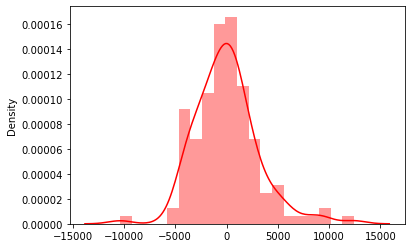

In [113]:
sb.distplot(Residual, bins =20,color='r')

it looks like that mean is not '0'

In [114]:
# making prediction in test set

x_test_lr6=x_test[x6.columns]

In [115]:
x_test_lr6=sm.add_constant(x_test_lr6)

In [116]:
y_pred_new=lr6.predict(x_test_lr6)

In [117]:
y_pred_new.head()

7      27529.083369
20      6554.083840
10     20725.526360
131    14488.307987
188    11798.291116
dtype: float64

In [118]:
y_test.head()

7      18920.0
20      6575.0
10     16430.0
131     9895.0
188     9995.0
Name: price, dtype: float64

 ### Residual analysis of test data

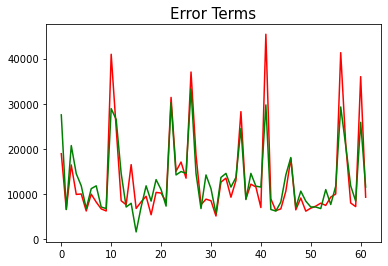

In [119]:
# Error terms

c = [i for i in range(len(y_pred_new))]

plt.plot(c,y_test, color="red");
plt.plot(c, y_pred_new,color = 'green');
plt.title('Error Terms',fontsize=15);


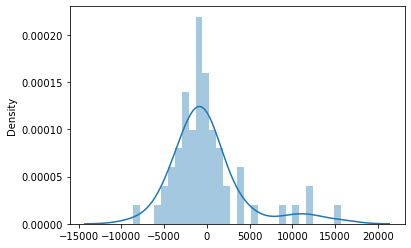

In [120]:
# Plotting the error terms to understand the distribution.
                
sb.distplot((y_test-y_pred_new),bins=30) ;                  

it looks like that mean is not 0, and scale of ‘Price’ lies in negative number

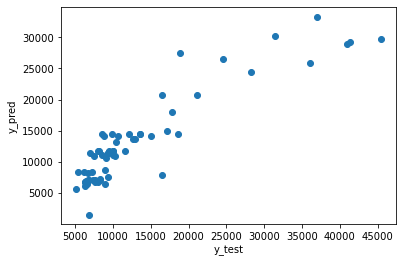

In [121]:
plt.scatter(y_test, y_pred_new);
plt.xlabel('y_test');
plt.ylabel('y_pred');

In [122]:
r2_score(y_test, y_pred_new)

0.8024180294654983

The R2 score of Training set is 0.807 and Test set is 0.802 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables


carbody_hatchback	
carwidth	
car_company_peugeot	
carbody_wagon	
car_company_bmw	
enginelocation_rear

These are the variables that are significant in predicting the price of a car.